## Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import ttg
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from keras_visualizer import visualizer

## Data Preparation

In [29]:
def AND_Dataset(n):
    string = []
    for i in range(n):
        string.append(str(i))
    result = []
    s = ''
    for i in range(len(string)-1):
        s += string[i] + ' and '
    s += string[len(string)-1]
    result.append(s)
    table = ttg.Truths(string, result)
    data = table.as_pandas()
    data.rename(columns={s:'output'}, inplace = True)
    return data;

In [30]:
df = AND_Dataset(10)
df.to_csv("data_10inputAND.csv", index = False)
df = np.asarray(df).astype(np.float32)

In [31]:
train_df = df[0:716]
val_df = df[716:870]
test_df = df[870:1024]

X_train = train_df[:, 0:10]
y_train = train_df[:, 10]
X_val = val_df[:, 0:10]
y_val = val_df[:, 10]
X_test = test_df[:, 0:10]
y_test = test_df[:, 10]

## Model Preparation

In [32]:
model = Sequential()

model.add(Dense(100, input_shape=(10,), activation = 'tanh'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [33]:
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=29, shuffle=False, verbose=1)

Epoch 1/29
23/23 [==============================] - 0s 7ms/step - loss: 0.4522 - accuracy: 0.8790 - val_loss: 0.1386 - val_accuracy: 1.0000
Epoch 2/29
23/23 [==============================] - 0s 2ms/step - loss: 0.0861 - accuracy: 0.9951 - val_loss: 0.0580 - val_accuracy: 1.0000
Epoch 3/29
23/23 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9951 - val_loss: 0.0365 - val_accuracy: 1.0000
Epoch 4/29
23/23 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9951 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 5/29
23/23 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9951 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 6/29
23/23 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9951 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 7/29
23/23 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9951 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 8/29
23/23 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


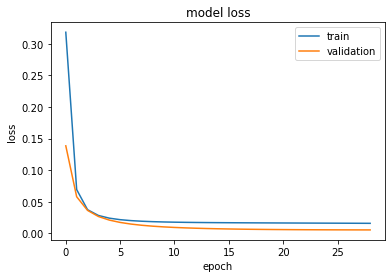

In [44]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('keras_gd.png')
plt.show()

## Model Evaluation

In [35]:
y_pred = model.predict(X_test)

In [36]:
y_predicted = [np.argmax(i) for i in y_pred]

In [37]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cm

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[154]])>

Text(69.0, 0.5, 'Truth')

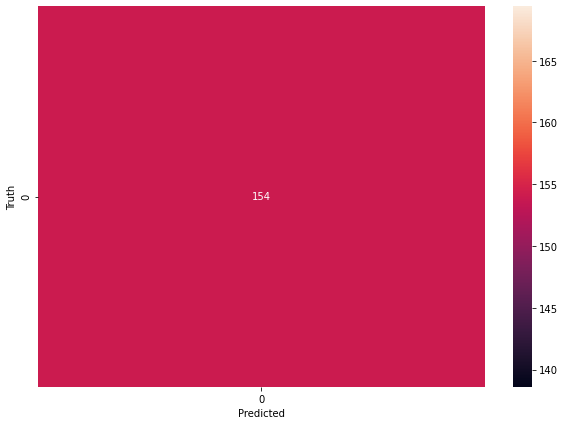

In [38]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')